In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ab_stats.csv')

# читаем первые 5 строк
df.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


In [4]:
df.duplicated(subset=["av_site visit"]).any()

True

In [5]:
df["av_site visit"].sort_values(ascending=False).head()

14763    22.446822
20476    21.170911
16541    20.684295
20413    20.500358
17972    20.340869
Name: av_site visit, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [8]:
df[df['ab_group']=='A'].describe()

,revenue,num_purchases,purchase,av_site visit
count,11835.000000,11835.000000,11835.000000,11835.000000
mean,0.404462,0.050697,0.021631,6.974724
std,13.133218,1.467511,0.145481,2.023533
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.656155
50%,0.000000,0.000000,0.000000,6.982329
75%,0.000000,0.000000,0.000000,8.345572
max,1303.609284,152.000000,1.000000,17.728836


In [11]:
df[df['ab_group']=='B'].describe()

,revenue,num_purchases,purchase,av_site visit
count,11817.000000,11817.000000,11817.000000,11817.000000
mean,0.244794,0.036473,0.019802,7.051559
std,3.176534,0.418480,0.139325,3.976799
min,0.000000,0.000000,0.000000,-8.286822
25%,0.000000,0.000000,0.000000,4.380984
50%,0.000000,0.000000,0.000000,7.060873
75%,0.000000,0.000000,0.000000,9.768648
max,113.830000,25.000000,1.000000,22.446822


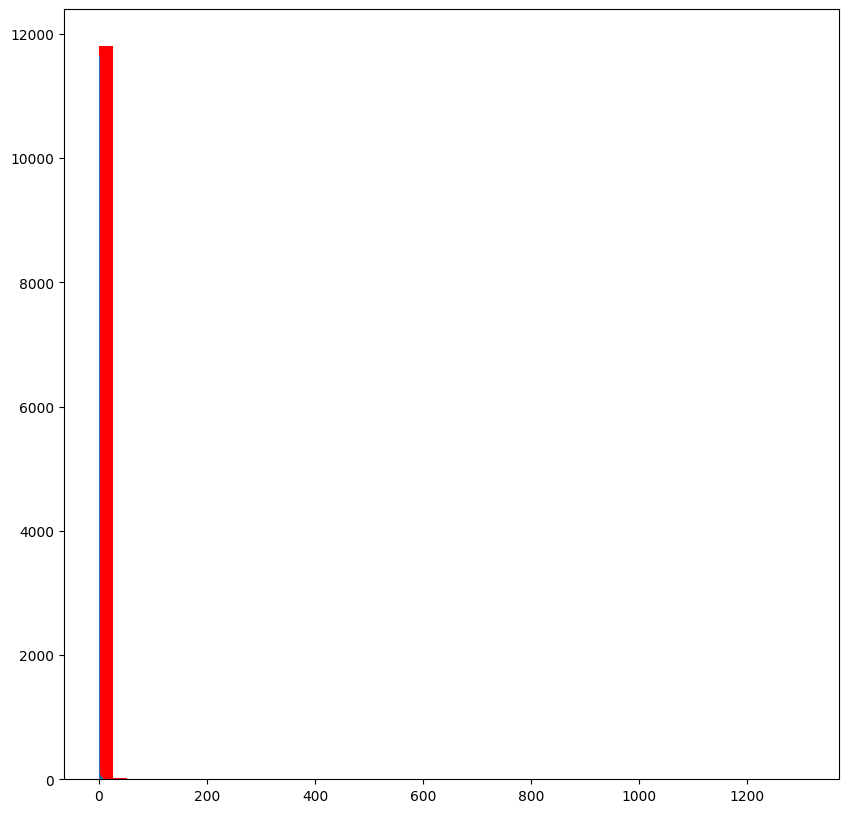

In [12]:
plt.figure(figsize=(10, 10))
control_visit_all = df['revenue'][df['ab_group']=='A']
test_visit_all =df['revenue'][df['ab_group']=='B']


plt.hist(control_visit_all, color='r', bins=50)
plt.hist(test_visit_all,  bins=50)


plt.show()

In [13]:
from scipy.stats import mannwhitneyu

control_revenue = df[df['ab_group'] == 'A']['revenue'].values
variant_revenue = df[df['ab_group'] == 'B']['revenue'].values

mw_stats = mannwhitneyu(x=control_revenue, y=variant_revenue)
print(mw_stats)

MannwhitneyuResult(statistic=70054756.0, pvalue=0.3243889561742552)


In [16]:
revenue_a = df['revenue'][df['ab_group']=='A'].sum()
print(revenue_a)
revenue_b =df['revenue'][df['ab_group']=='B'].sum()
print(revenue_b)


4786.807972
2892.7357889999985
